# Preparation and Data

In [243]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import pandas as pd


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


housing = pd.read_csv("Datasets/housing.csv")
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


housing_with_index = housing.reset_index()
housing_with_index

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


# Description of Data

In [244]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [245]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [246]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Histogram plots of numerical attributes

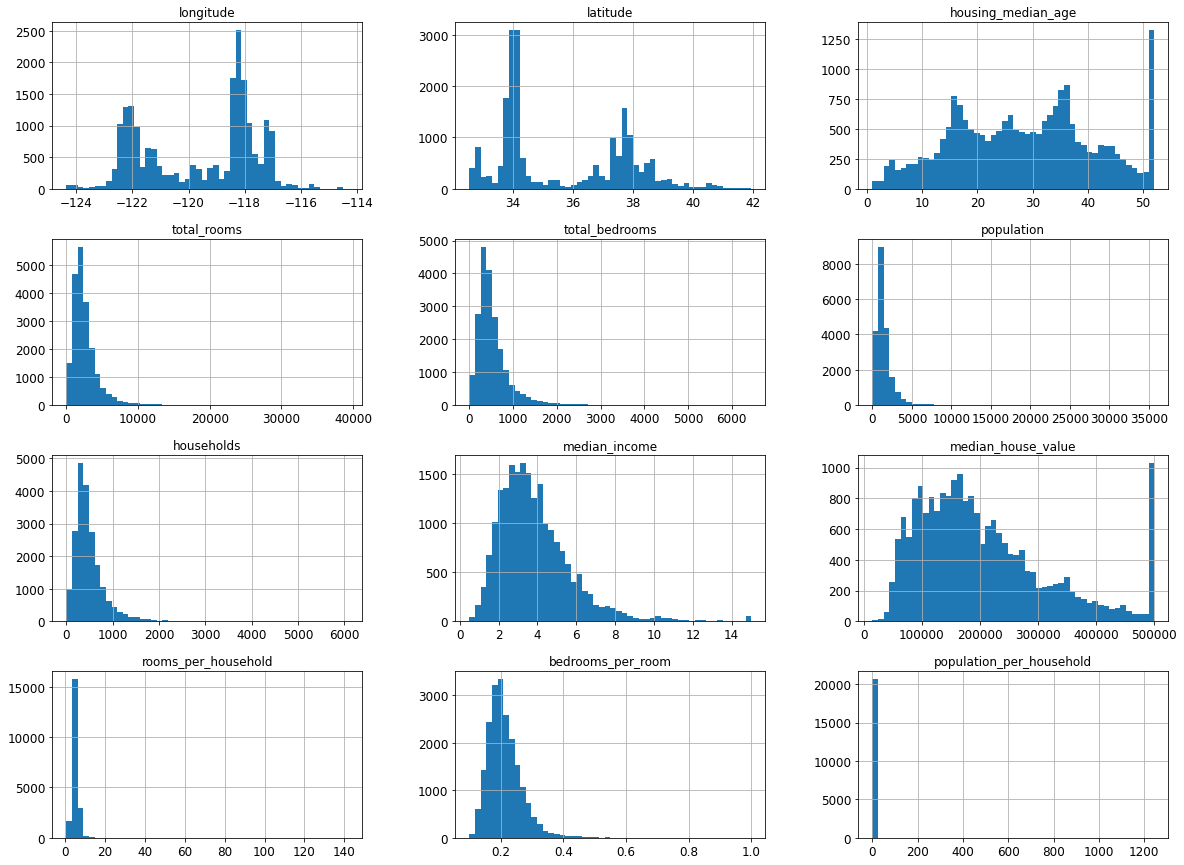

In [247]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Note: Median_Income is in 10000s Also may need to transform the tail heavy features

## Creating a training and test sets

In [248]:
import Utils as utils
train_set,test_set = utils.train_test_maker(housing_with_index,0.2)

In [249]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Note: sklearn.model_selection.train_test_split can also be used

In [250]:
a = utils.stratum_maker(housing_with_index,"median_income","income_cat",bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

In [251]:
a

0        (6.0, inf]
1        (6.0, inf]
2        (6.0, inf]
3        (4.5, 6.0]
4        (3.0, 4.5]
            ...    
20635    (1.5, 3.0]
20636    (1.5, 3.0]
20637    (1.5, 3.0]
20638    (1.5, 3.0]
20639    (1.5, 3.0]
Name: income_cat, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.0, 1.5] < (1.5, 3.0] < (3.0, 4.5] < (4.5, 6.0] < (6.0, inf]]

<AxesSubplot:>

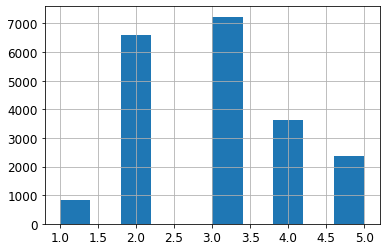

In [252]:
pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5]).hist()

### train and test set should be representative of the median_income feature since it is decided to be an important feature

In [253]:
test_set_strat , train_set_strat = utils.stratified_shuffled_sampling(housing_with_index,"median_income","income_cat",
                                                                     [0., 1.5, 3.0, 4.5, 6., np.inf],[1, 2, 3, 4, 5],1,0.2)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass test_size=0.2, train_size=42 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [254]:
test_set_strat

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
2198,2198,-119.88,36.85,8.0,2580.0,372.0,1111.0,393.0,7.5000,256200.0,INLAND,6.564885,0.144186,2.826972,"(6.0, inf]"
12523,12523,-121.47,38.56,44.0,1986.0,573.0,1044.0,490.0,1.7328,88100.0,INLAND,4.053061,0.288520,2.130612,"(1.5, 3.0]"
5696,5696,-118.26,34.24,35.0,1535.0,283.0,816.0,287.0,6.1873,312100.0,<1H OCEAN,5.348432,0.184365,2.843206,"(6.0, inf]"
20402,20402,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN,5.175926,0.196482,3.117284,"(3.0, 4.5]"
6669,6669,-118.11,34.16,52.0,3158.0,459.0,1229.0,444.0,5.4223,325600.0,INLAND,7.112613,0.145345,2.768018,"(4.5, 6.0]"
12311,12311,-116.72,33.56,13.0,3166.0,682.0,1250.0,475.0,2.3550,122900.0,INLAND,6.665263,0.215414,2.631579,"(1.5, 3.0]"
2615,2615,-124.11,40.95,19.0,1734.0,365.0,866.0,342.0,2.9600,81700.0,NEAR OCEAN,5.070175,0.210496,2.532164,"(1.5, 3.0]"
14317,14317,-117.14,32.70,48.0,510.0,180.0,545.0,132.0,1.8008,86500.0,NEAR OCEAN,3.863636,0.352941,4.128788,"(1.5, 3.0]"
10148,10148,-117.92,33.91,27.0,2558.0,310.0,891.0,316.0,9.5561,411800.0,<1H OCEAN,8.094937,0.121188,2.819620,"(6.0, inf]"
11660,11660,-118.01,33.81,18.0,5238.0,1083.0,3032.0,1065.0,4.4583,190100.0,<1H OCEAN,4.918310,0.206758,2.846948,"(3.0, 4.5]"


In [255]:
test_set_strat["income_cat"].value_counts()/len(test_set_strat)

(3.0, 4.5]    0.357143
(1.5, 3.0]    0.309524
(4.5, 6.0]    0.166667
(6.0, inf]    0.119048
(0.0, 1.5]    0.047619
Name: income_cat, dtype: float64

In [256]:
for set_ in (train_set_strat,test_set_strat):
    set_.drop("income_cat",axis=1,inplace=True)

In [257]:
test_set_strat

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2198,2198,-119.88,36.85,8.0,2580.0,372.0,1111.0,393.0,7.5000,256200.0,INLAND,6.564885,0.144186,2.826972
12523,12523,-121.47,38.56,44.0,1986.0,573.0,1044.0,490.0,1.7328,88100.0,INLAND,4.053061,0.288520,2.130612
5696,5696,-118.26,34.24,35.0,1535.0,283.0,816.0,287.0,6.1873,312100.0,<1H OCEAN,5.348432,0.184365,2.843206
20402,20402,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN,5.175926,0.196482,3.117284
6669,6669,-118.11,34.16,52.0,3158.0,459.0,1229.0,444.0,5.4223,325600.0,INLAND,7.112613,0.145345,2.768018
12311,12311,-116.72,33.56,13.0,3166.0,682.0,1250.0,475.0,2.3550,122900.0,INLAND,6.665263,0.215414,2.631579
2615,2615,-124.11,40.95,19.0,1734.0,365.0,866.0,342.0,2.9600,81700.0,NEAR OCEAN,5.070175,0.210496,2.532164
14317,14317,-117.14,32.70,48.0,510.0,180.0,545.0,132.0,1.8008,86500.0,NEAR OCEAN,3.863636,0.352941,4.128788
10148,10148,-117.92,33.91,27.0,2558.0,310.0,891.0,316.0,9.5561,411800.0,<1H OCEAN,8.094937,0.121188,2.819620
11660,11660,-118.01,33.81,18.0,5238.0,1083.0,3032.0,1065.0,4.4583,190100.0,<1H OCEAN,4.918310,0.206758,2.846948


### Always a good practice to work on a copy of training set

In [258]:
housing_train = train_set_strat.copy()

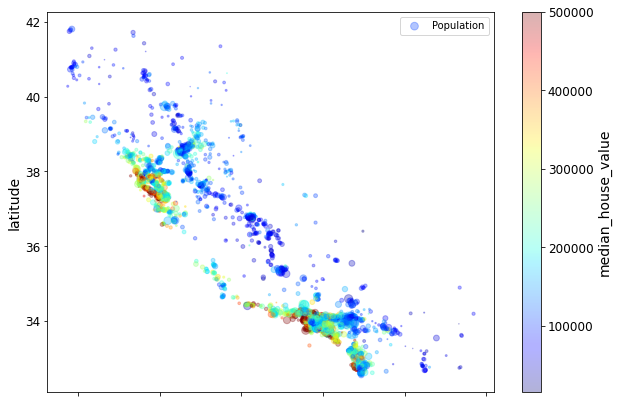

In [259]:
housing_train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3,
                  s = housing_train["population"]/100,label="Population",figsize=(10,7),
                  c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### from the above it seems that housing prices are related to population and location

#### Correlation between features

In [260]:
corr_matrix = housing_train.corr()

In [261]:
corr_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
index,1.000000,-0.122747,0.081713,-0.179576,0.052319,0.028061,0.013983,0.021213,0.068965,0.077662,0.052019,-0.102212,-0.027489
longitude,-0.122747,1.000000,-0.926739,-0.119431,0.062311,0.086998,0.117448,0.071424,-0.011497,-0.048255,-0.037643,0.096307,0.122907
latitude,0.081713,-0.926739,1.000000,0.018920,-0.053188,-0.084212,-0.127196,-0.086076,-0.080141,-0.137398,0.120081,-0.116514,-0.120173
housing_median_age,-0.179576,-0.119431,0.018920,1.000000,-0.363795,-0.324721,-0.309943,-0.309001,-0.102795,0.118668,-0.172454,0.144415,0.001840
total_rooms,0.052319,0.062311,-0.053188,-0.363795,1.000000,0.928907,0.854575,0.916776,0.204220,0.139422,0.160025,-0.206772,-0.110869
total_bedrooms,0.028061,0.086998,-0.084212,-0.324721,0.928907,1.000000,0.876635,0.977944,-0.009581,0.054414,-0.000399,0.081002,-0.140289
population,0.013983,0.117448,-0.127196,-0.309943,0.854575,0.876635,1.000000,0.910439,0.002478,-0.029350,-0.076955,0.031210,0.154536
households,0.021213,0.071424,-0.086076,-0.309001,0.916776,0.977944,0.910439,1.000000,0.013442,0.067926,-0.080937,0.059043,-0.125417
median_income,0.068965,-0.011497,-0.080141,-0.102795,0.204220,-0.009581,0.002478,0.013442,1.000000,0.686801,0.373567,-0.634050,-0.038784
median_house_value,0.077662,-0.048255,-0.137398,0.118668,0.139422,0.054414,-0.029350,0.067926,0.686801,1.000000,0.161584,-0.245525,-0.176882


In [262]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686801
rooms_per_household         0.161584
total_rooms                 0.139422
housing_median_age          0.118668
index                       0.077662
households                  0.067926
total_bedrooms              0.054414
population                 -0.029350
longitude                  -0.048255
latitude                   -0.137398
population_per_household   -0.176882
bedrooms_per_room          -0.245525
Name: median_house_value, dtype: float64

#### based on correlation median_income,rooms_per_household, total_rooms, population_per_household and bedrooms_per_room have highest correlation with median_house_value

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='median_income', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_inco

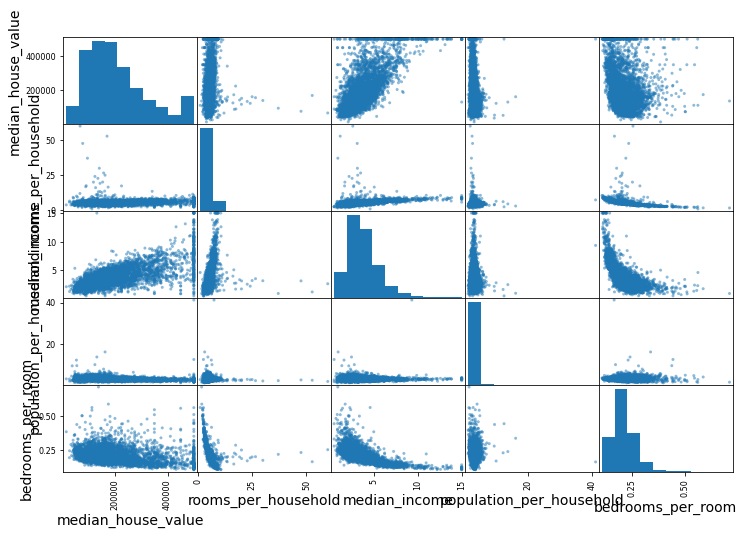

In [263]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","rooms_per_household", "median_income", "population_per_household","bedrooms_per_room"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

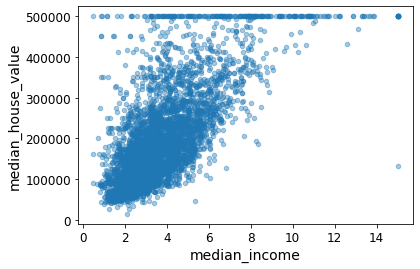

In [264]:
housing_train.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.4)

#### Note horizontal lines at 500k, 450k, 350k (we may need to remove these data) to prevent our algo from reproducing this quirk

In [265]:
housing = train_set_strat.drop("median_house_value",axis=1) # drop() creates a copy of the data and doesn't affect train_set_strat
housing_labels = train_set_strat["median_house_value"].copy()

#### To deal with missing values on individual basis use utils.rectify_missing_vals but in general scikit-learn SimpleImputer can be applied to whole dataset

In [266]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([ 1.01580000e+04, -1.18490000e+02,  3.42500000e+01,  2.90000000e+01,
        2.13400000e+03,  4.37000000e+02,  1.16750000e+03,  4.10000000e+02,
        3.53535000e+00,  5.22919007e+00,  2.03351580e-01,  2.81844490e+00])

In [267]:
X = imputer.transform(housing_num)

In [268]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
13301,13301.0,-117.63,34.07,39.0,2650.0,511.0,1537.0,495.0,3.4432,5.353535,0.192830,3.105051
13512,13512.0,-117.32,34.11,41.0,1229.0,302.0,994.0,270.0,1.4891,4.551852,0.245728,3.681481
9612,9612.0,-120.47,37.29,16.0,749.0,222.0,1277.0,224.0,1.2054,3.343750,0.296395,5.700893
12738,12738.0,-121.36,38.63,28.0,6119.0,985.0,2631.0,934.0,4.8750,6.551392,0.160974,2.816916
11983,11983.0,-117.48,34.01,23.0,2000.0,376.0,1361.0,388.0,4.3690,5.154639,0.188000,3.507732
...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8783.0,-118.31,33.79,38.0,1601.0,352.0,711.0,304.0,3.3958,5.266447,0.219863,2.338816
10165,10165.0,-117.94,33.91,18.0,8836.0,1527.0,3946.0,1451.0,5.6441,6.089593,0.172816,2.719504
16462,16462.0,-121.27,38.11,11.0,3163.0,794.0,2106.0,762.0,2.4482,4.150919,0.251028,2.763780
8278,8278.0,-118.16,33.78,29.0,3684.0,1301.0,3891.0,1143.0,1.6955,3.223097,0.353149,3.404199


In [269]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
13301,INLAND
13512,INLAND
9612,INLAND
12738,INLAND
11983,INLAND
...,...
8783,<1H OCEAN
10165,<1H OCEAN
16462,INLAND
8278,NEAR OCEAN


#### we have to convert ocean_proximity from categorical variable to numerical variable

In [270]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [4.],
       [1.]])

In [271]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### in the above encoding two nearby values are not necessarily more similar that two distant values but ML algorithms will assume otherwise therefore it is better to apply one hot encoding

In [272]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [273]:
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
13301,13301.0,-117.63,34.07,39.0,2650.0,511.0,1537.0,495.0,3.4432,5.353535,0.192830,3.105051
13512,13512.0,-117.32,34.11,41.0,1229.0,302.0,994.0,270.0,1.4891,4.551852,0.245728,3.681481
9612,9612.0,-120.47,37.29,16.0,749.0,222.0,1277.0,224.0,1.2054,3.343750,0.296395,5.700893
12738,12738.0,-121.36,38.63,28.0,6119.0,985.0,2631.0,934.0,4.8750,6.551392,0.160974,2.816916
11983,11983.0,-117.48,34.01,23.0,2000.0,376.0,1361.0,388.0,4.3690,5.154639,0.188000,3.507732
...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8783.0,-118.31,33.79,38.0,1601.0,352.0,711.0,304.0,3.3958,5.266447,0.219863,2.338816
10165,10165.0,-117.94,33.91,18.0,8836.0,1527.0,3946.0,1451.0,5.6441,6.089593,0.172816,2.719504
16462,16462.0,-121.27,38.11,11.0,3163.0,794.0,2106.0,762.0,2.4482,4.150919,0.251028,2.763780
8278,8278.0,-118.16,33.78,29.0,3684.0,1301.0,3891.0,1143.0,1.6955,3.223097,0.353149,3.404199


#### We can do all the feature engineering using pipeline

In [274]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scaler',StandardScaler())
])

In [275]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [276]:
housing_num_tr

array([[ 0.51924495,  0.97017561, -0.73521666, ..., -0.02410248,
        -0.3517009 ,  0.15990745],
       [ 0.55475156,  1.12405462, -0.71651633, ..., -0.40563391,
         0.59499945,  0.72233713],
       [-0.1015317 , -0.43955468,  0.77015972, ..., -0.98058504,
         1.50177071,  2.69269776],
       ...,
       [ 1.05117095, -0.8366618 ,  1.15351644, ..., -0.59644316,
         0.6898389 , -0.17307419],
       [-0.32601423,  0.70709214, -0.87079403, ..., -1.03800529,
         2.517472  ,  0.4517902 ],
       [ 1.54136406, -0.6331444 ,  0.97586333, ...,  0.41281858,
        -0.52636055,  0.29832472]])

#### Better option is to use ColumnTransformer from sklearn.compose

In [277]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

#### Now after preprocessing is done let's train a linear regression on the data and try it on some points in training set

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [279]:
some_points = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
points_prepared = full_pipeline.transform(some_points)
print("Predictions: ",lin_reg.predict(points_prepared))

Predictions:  [155741.83497431  75707.94146703  22728.83808444 194118.38233516
 161020.34797133]


In [280]:
print("Labels: ",list(some_labels))

Labels:  [106700.0, 67300.0, 60900.0, 146400.0, 121100.0]


In [281]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67529.35864821215

#### Now let's compare the result with a decision tree regressor

In [282]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Now let's train using cross validation method

In [288]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

#### Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [289]:
tree_rmse_scores

array([81104.29704451, 71705.14149463, 69322.6998104 , 73449.6406519 ,
       71611.00602267, 75802.95368251, 77920.40025774, 63847.55993358,
       73092.42552391, 68684.54215915])

In [291]:
import joblib
joblib.dump(tree_reg,"my_tree.pkl")

['my_tree.pkl']

In [292]:
# to load
tree_reg = joblib.load("my_tree.pkl")

In [293]:
tree_reg

DecisionTreeRegressor()

#### Grid searching the hyperparameter space

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [302]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [303]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [304]:
curves = grid_search.cv_results_

In [305]:
for mean_score,params in zip(curves["mean_test_score"],curves["params"]):
    print(np.sqrt(-mean_score),params)

68765.13854216543 {'max_features': 2, 'n_estimators': 3}
57700.443568323055 {'max_features': 2, 'n_estimators': 10}
55126.05380376926 {'max_features': 2, 'n_estimators': 30}
62607.57917547094 {'max_features': 4, 'n_estimators': 3}
55446.498376596915 {'max_features': 4, 'n_estimators': 10}
53018.428523738796 {'max_features': 4, 'n_estimators': 30}
61799.196217784665 {'max_features': 6, 'n_estimators': 3}
54627.36250735095 {'max_features': 6, 'n_estimators': 10}
52426.55727287507 {'max_features': 6, 'n_estimators': 30}
62186.62349674753 {'max_features': 8, 'n_estimators': 3}
54445.63342551242 {'max_features': 8, 'n_estimators': 10}
52220.051419109965 {'max_features': 8, 'n_estimators': 30}
66425.65931960975 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56545.77189963413 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
63365.55212685285 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53948.85182868162 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [306]:
grid_search.cv_results_

{'mean_fit_time': array([0.02131462, 0.04415402, 0.12427235, 0.0194469 , 0.06519494,
        0.21144857, 0.02874804, 0.09496284, 0.29342623, 0.03858461,
        0.11861691, 0.34598918, 0.02016368, 0.06731   , 0.03349161,
        0.08335838, 0.03206286, 0.09831462]),
 'std_fit_time': array([0.00836428, 0.00201116, 0.00322446, 0.00046267, 0.00321264,
        0.00914986, 0.00136195, 0.00202589, 0.04122775, 0.00137555,
        0.00402392, 0.01115848, 0.00119162, 0.00086222, 0.01217164,
        0.00224832, 0.00175424, 0.00540579]),
 'mean_score_time': array([0.00176883, 0.00254502, 0.00659466, 0.00134292, 0.00288777,
        0.0075428 , 0.0014523 , 0.00330949, 0.00729122, 0.00198016,
        0.00313163, 0.00737324, 0.00135217, 0.00369802, 0.00183539,
        0.00318079, 0.00163164, 0.00285997]),
 'std_score_time': array([4.11952037e-04, 6.38619374e-05, 9.65965459e-05, 2.31685092e-04,
        7.22650660e-04, 6.11192664e-04, 2.54091421e-04, 3.30703982e-04,
        9.15011874e-04, 4.62159828e-

In [324]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
attributes

['index',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [325]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.38449656884183364, 'median_income'),
 (0.13820403962093283, 'INLAND'),
 (0.10403959824172948, 'population_per_household'),
 (0.07071934254450582, 'bedrooms_per_room'),
 (0.05152484752245266, 'longitude'),
 (0.04851098727497468, 'index'),
 (0.04763374315636922, 'latitude'),
 (0.04583770090510397, 'rooms_per_household'),
 (0.0425639775502372, 'housing_median_age'),
 (0.016326491559519325, 'population'),
 (0.015211240744617556, 'total_bedrooms'),
 (0.01455265010610673, 'total_rooms'),
 (0.011780571541753836, 'households'),
 (0.003666940736934359, '<1H OCEAN'),
 (0.002686528603810393, 'NEAR BAY'),
 (0.0019875150252422953, 'NEAR OCEAN'),
 (0.00025725602387598884, 'ISLAND')]

#### when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV

In [307]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [308]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [309]:
grid_search.cv_results_

{'mean_fit_time': array([0.07236252, 0.01902261, 0.03274498, 0.10741959, 0.08490572,
        0.01287661, 0.12532053, 0.32904906, 0.21007996, 0.02501912]),
 'std_fit_time': array([0.00927455, 0.00034749, 0.00050127, 0.00113163, 0.00236   ,
        0.00021907, 0.00421673, 0.01250318, 0.01877026, 0.00142456]),
 'mean_score_time': array([0.00318356, 0.00142365, 0.0012918 , 0.0026782 , 0.00260305,
        0.00121961, 0.00661206, 0.0067977 , 0.00698457, 0.00150528]),
 'std_score_time': array([2.40445552e-04, 3.40484437e-05, 5.28501233e-05, 1.14592452e-04,
        1.16267332e-04, 1.18087507e-04, 5.18523960e-05, 6.38639127e-04,
        6.27336534e-04, 3.00998923e-04]),
 'param_n_estimators': masked_array(data=[10, 3, 3, 10, 10, 3, 30, 30, 30, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[2, 2, 8, 8, 6, 2, 2, 8, 4, 3],
              m

In [314]:
for mean_test_score,param in zip(grid_search.cv_results_["mean_test_score"],grid_search.cv_results_["params"]):
    print(np.sqrt(-mean_test_score),param)

56456.06476614543 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
65570.14304620188 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
63669.455124763546 {'n_estimators': 3, 'max_features': 8}
53995.05248246165 {'n_estimators': 10, 'max_features': 8}
54437.473333372815 {'n_estimators': 10, 'max_features': 6}
68319.30201414529 {'n_estimators': 3, 'max_features': 2}
55167.87766759748 {'n_estimators': 30, 'max_features': 2}
52195.72669686156 {'n_estimators': 30, 'max_features': 8}
52653.78304730423 {'n_estimators': 30, 'max_features': 4}
61942.583065292805 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}


#### Now it is time to evaluate our model on test set (remember we dont' want to train our model on test set)

In [326]:
final_model = grid_search.best_estimator_
X_test = test_set_strat.drop("median_house_value",axis=1)
y_test = test_set_strat["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) ## transform NOT fit_transform
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [327]:
final_rmse

40190.28925033124

#### Computing 95% confidence interval for the generalization error

In [329]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                               loc = squared_errors.mean(),
                               scale = stats.sem(squared_errors)))

array([26202.94279593, 50437.33229349])